In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={'Genre':'Gender'}, inplace=True)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [10]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
cols = []
for i in df.columns[1:]:
    cols.append(i)
cols

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

/home/jxd/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jxd/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jxd/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

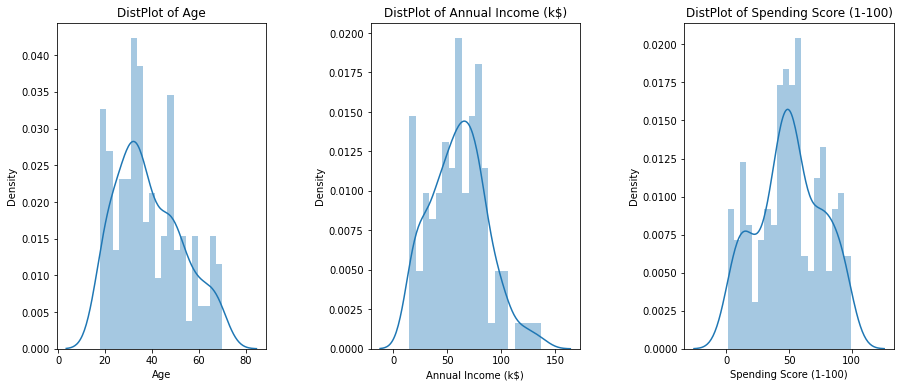

In [12]:
import plotly.figure_factory as ff
plt.figure(1, figsize = (15,6))
n = 0
for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[i], hist=True, bins = 20, kde=True)
    plt.title('DistPlot of {}'.format(i))
plt.show()

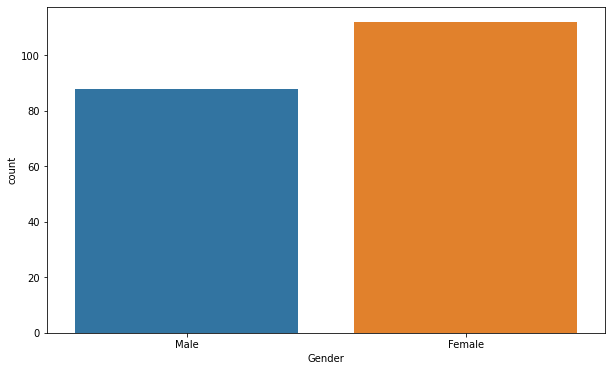

In [13]:
plt.figure(2, figsize=(10,6))
sns.countplot(data = df, x = 'Gender')
plt.show()

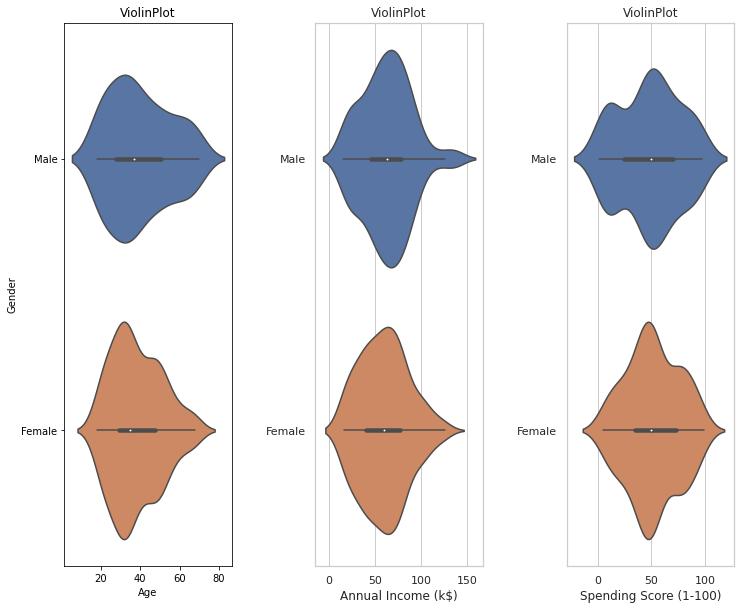

In [14]:
plt.figure(3, figsize=(12,10))
n = 0
for i in cols:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = i, y = 'Gender', data = df)
    plt.ylabel('Gender' if n ==1 else '')
    plt.title('ViolinPlot')
plt.show()

In [15]:
age_1825 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_2635 = df.Age[(df.Age > 25) & (df.Age <= 35)]
age_3645 = df.Age[(df.Age > 35) & (df.Age <= 45)]
age_4655 = df.Age[(df.Age > 45) & (df.Age <= 55)]
age_55abv = df.Age[df.Age > 55]

In [16]:
print(len(age_1825.values))

38


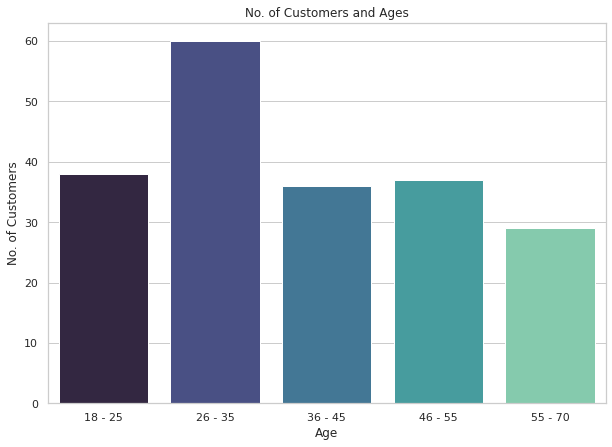

In [17]:
agex = ['18 - 25', '26 - 35', '36 - 45', '46 - 55', '55 - 70']
agey = [len(age_1825), len(age_2635), len(age_3645), len(age_4655), len(age_55abv)]

plt.figure(4, figsize=(10, 7))
sns.barplot(x=agex, y = agey, palette='mako')
plt.title('No. of Customers and Ages')
plt.xlabel('Age')
plt.ylabel('No. of Customers')
plt.show()

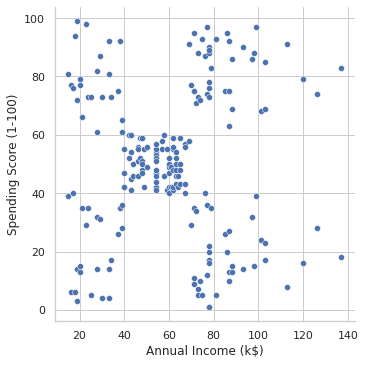

In [18]:
sns.relplot(x = cols[1], y = cols[2], data = df )

In [19]:
ss1 = df[cols[2]][(df[cols[2]] >=1 ) & (df[cols[2]] <=20)]
ss2 = df[cols[2]][(df[cols[2]] >=21 ) & (df[cols[2]] <=40)]
ss3 = df[cols[2]][(df[cols[2]] >=41 ) & (df[cols[2]] <=60)]
ss4 = df[cols[2]][(df[cols[2]] >=61 ) & (df[cols[2]] <=80)]
ss5 = df[cols[2]][(df[cols[2]] >=81 ) & (df[cols[2]] <=99)]

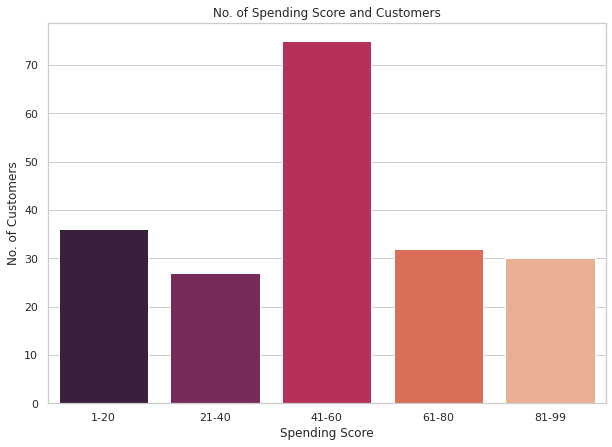

In [20]:
ssx = ['1-20', '21-40', '41-60', '61-80', '81-99']
ssy = [len(ss1), len(ss2), len(ss3), len(ss4), len(ss5)]

plt.figure(4, figsize=(10, 7))
sns.barplot(x=ssx, y = ssy, palette='rocket')
plt.title('No. of Spending Score and Customers')
plt.xlabel('Spending Score')
plt.ylabel('No. of Customers')
plt.show()

In [21]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [22]:
ai30 = df[cols[1]][(df[cols[1]] >= 1) & (df[cols[1]] <= 30)]
ai60 = df[cols[1]][(df[cols[1]] >= 31) & (df[cols[1]] <= 60)]
ai90 = df[cols[1]][(df[cols[1]] >= 61) & (df[cols[1]] <= 90)]
ai120 = df[cols[1]][(df[cols[1]] >= 91) & (df[cols[1]] <= 120)]
ai150 = df[cols[1]][(df[cols[1]] >= 121) & (df[cols[1]] <= 150)]

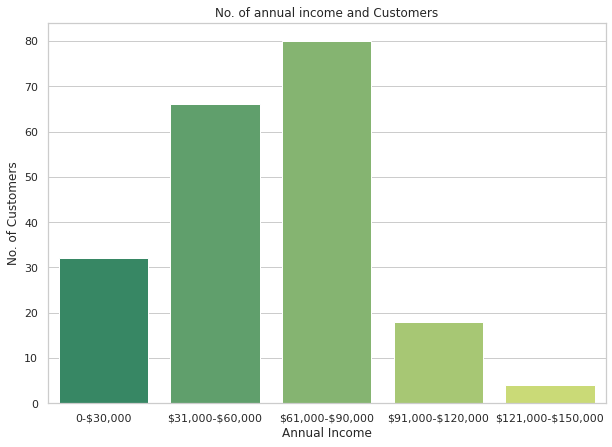

In [23]:
aix = ['0-$30,000', '\$31,000-$60,000', '\$61,000-$90,000', '\$91,000-$120,000', '\$121,000-$150,000']
aiy = [len(ai30), len(ai60), len(ai90), len(ai120), len(ai150)]

plt.figure(4, figsize=(10, 7))
sns.barplot(x=aix, y = aiy, palette='summer')
plt.title('No. of annual income and Customers')
plt.xlabel('Annual Income')
plt.ylabel('No. of Customers')
plt.show()

In [24]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

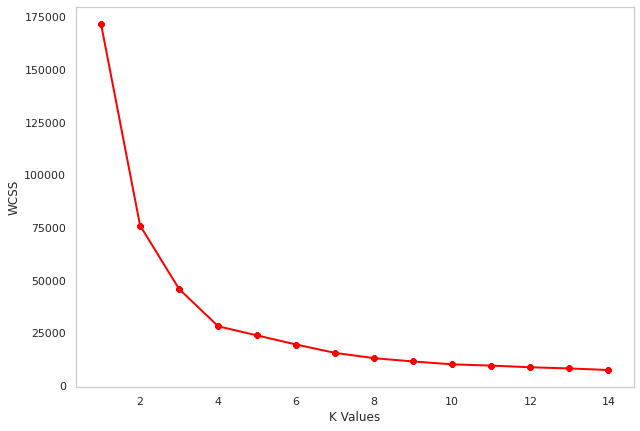

In [25]:
X1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.grid()
plt.plot(range(1,15), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

In [26]:
wcss

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23818.41168818787,
 19510.328802776166,
 15523.684014328754,
 13024.350726326822,
 11453.288911292724,
 10104.027865570422,
 9498.524807635169,
 8725.842521126218,
 8150.178777752455,
 7417.435328634641]

In [27]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 2 2 3 1 2 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3
 1 3 1 0 1 0 2 3 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 1 2 1 0 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [28]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


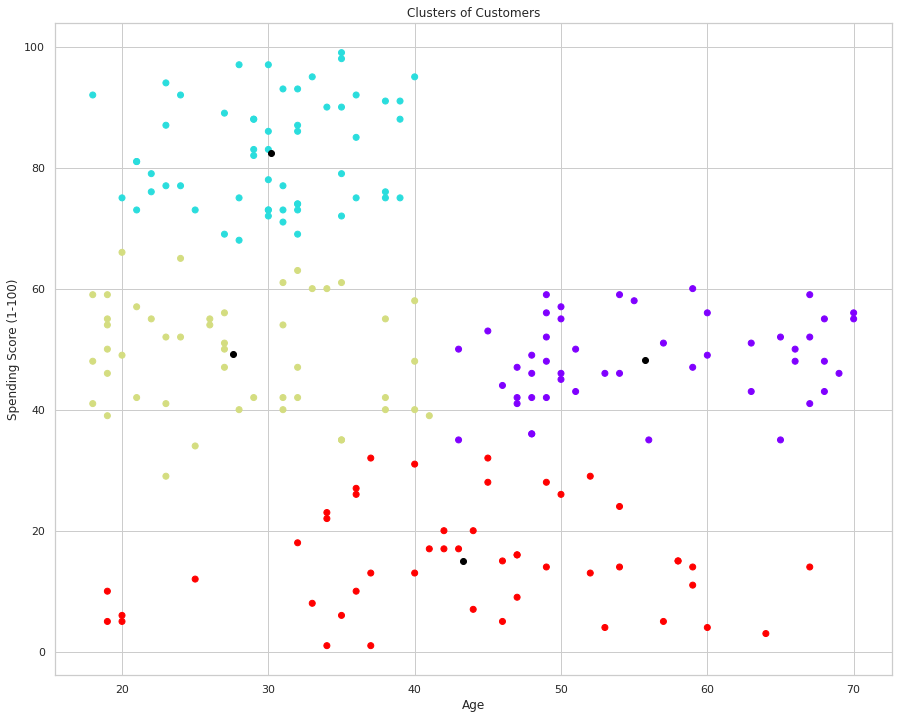

In [29]:
plt.figure(figsize=(15,12))
plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

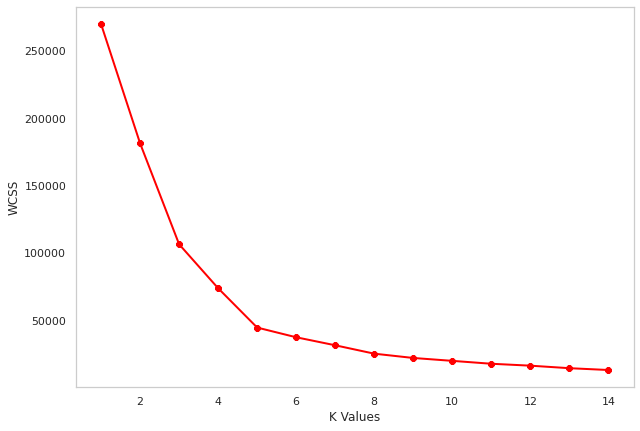

In [30]:
X2 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.grid()
plt.plot(range(1,15), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 3 1 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 0 2 3 2 0 2 0 2 3 2 0 2 0 2 0 2 0 2 3 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [32]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]]


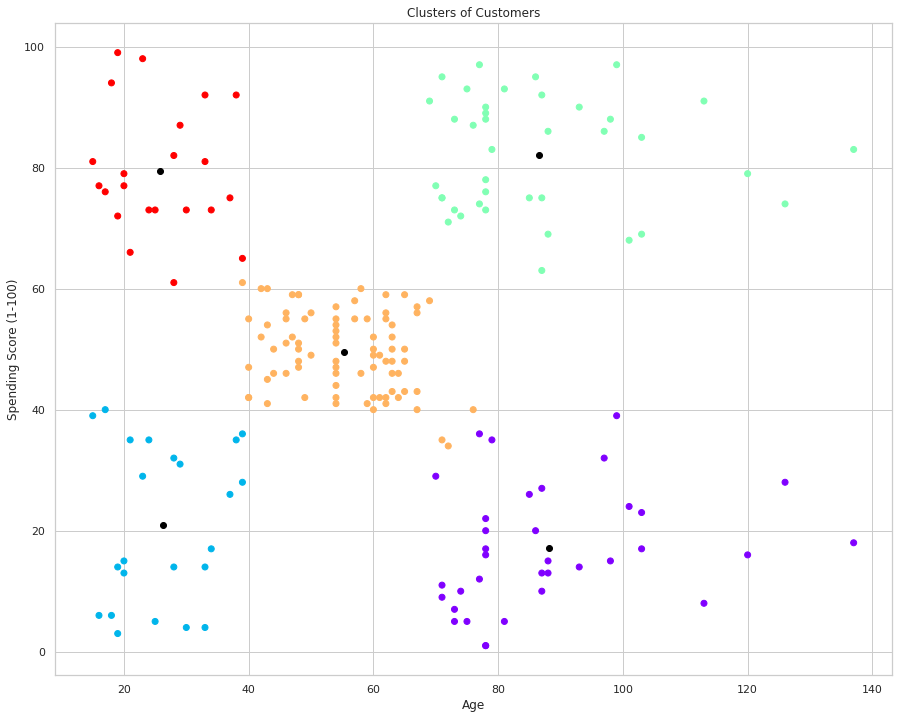

In [33]:
plt.figure(figsize=(15,12))
plt.scatter(X2[:, 0], X2[:, 1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

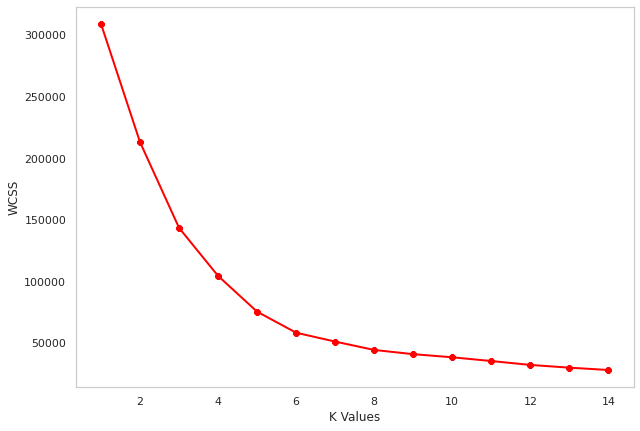

In [34]:
X3 = df.iloc[:, 1:]

from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.grid()
plt.plot(range(1,15), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=6)
label = kmeans.fit_predict(X3)
print(label)

[5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5
 0 5 0 4 0 5 1 5 0 4 1 1 1 4 1 1 4 4 4 4 4 1 4 4 1 4 4 4 1 4 4 1 1 4 4 4 4
 4 1 4 1 1 4 4 1 4 4 1 4 4 1 1 4 4 1 4 1 1 1 4 1 4 1 1 4 4 1 4 1 4 4 4 4 4
 1 1 1 1 1 4 4 4 4 1 1 1 3 1 3 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [36]:
print(kmeans.cluster_centers_)

[[25.27272727 25.72727273 79.36363636]
 [27.         56.65789474 49.13157895]
 [41.68571429 88.22857143 17.28571429]
 [32.69230769 86.53846154 82.12820513]
 [56.34090909 53.70454545 49.38636364]
 [44.31818182 25.77272727 20.27272727]]


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_zlabel'

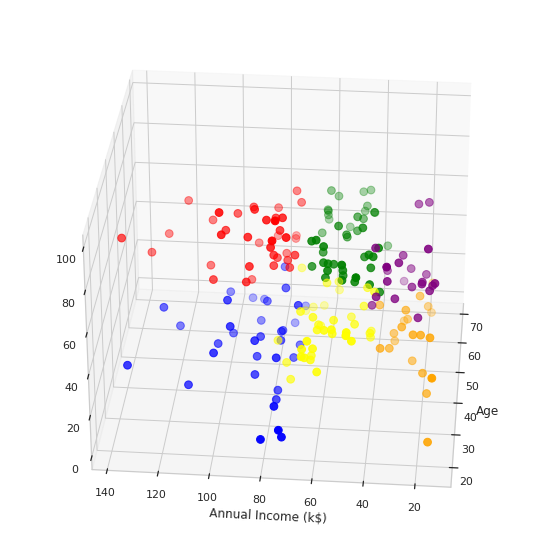

In [38]:
clusters = kmeans.fit_predict(X3)
df['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df[cols[1]][df.label == 0], df[cols[2]][df.label == 0], c = 'blue', s = 60)
ax.scatter(df.Age[df.label == 1], df[cols[1]][df.label == 1], df[cols[2]][df.label == 1], c = 'red', s = 60)
ax.scatter(df.Age[df.label == 2], df[cols[1]][df.label == 2], df[cols[2]][df.label == 2], c = 'green', s = 60)
ax.scatter(df.Age[df.label == 3], df[cols[1]][df.label == 3], df[cols[2]][df.label == 3], c = 'orange', s = 60)
ax.scatter(df.Age[df.label == 4], df[cols[1]][df.label == 4], df[cols[2]][df.label == 4], c = 'purple', s = 60)
ax.scatter(df.Age[df.label == 5], df[cols[1]][df.label == 5], df[cols[2]][df.label == 5], c = 'yellow', s = 60)
ax.view_init(30, 185)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.set_zlabel('Spending Score (1-100)')

plt.show()

In [ ]:
import mpl_toolkits